<a href="https://colab.research.google.com/github/ValdazoAmerico/BERT-TF-KERAS/blob/main/bert_and_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow_text

     |████████████████████████████████| 4.4 MB 10.7 MB/s 


In [2]:
import pandas as pd

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [4]:
df = pd.read_csv('SMSSpamCollection', delimiter="\t")
df.head(5)

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [48]:
df

,Type,Message
0,ham\tOk lar... Joking wif u oni...,NaN
1,spam\tFree entry in 2 a wkly comp to win FA Cu...,NaN
2,ham\tU dun say so early hor... U c already the...,NaN
3,ham\tNah I don't think he goes to usf,he lives around here though
4,spam\tFreeMsg Hey there darling it's been 3 we...,£1.50 to rcv
...,...,...
5568,spam\tThis is the 2nd time we have tried 2 con...,call 087187272008 NOW1! Only 10p per minute. ...
5569,ham\tWill ü b going to esplanade fr home?,NaN
5570,ham\tPity,* was in mood for that. So...any other sugges...
5571,ham\tThe guy did some bitching but I acted lik...,NaN


In [6]:
df

,Category,Message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.columns = ['Category', 'Message']

In [7]:
df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4824   4515                             Sorry, I'll call later   30
spam         747    653  Please call our customer service representativ...    4

In [8]:
df_spam = df[df['Category']=="spam"]
df_spam.shape

(747, 2)

In [9]:
df_ham = df[df['Category']=="ham"]
df_ham.shape

(4824, 2)

In [10]:
df_ham_downsampled = df_ham.sample(747)
df_ham_downsampled.shape

(747, 2)

In [11]:
df_balanced = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [12]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [13]:
df_balanced.sample(5)

,Category,Message
4929,spam,Got what it takes 2 take part in the WRC Rally...
2970,ham,U should make a fb list
1940,ham,Dude avatar 3d was imp. At one point i thought...
3017,ham,One of the joys in lifeis waking up each daywi...
1642,ham,Sleeping nt feeling well


In [14]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
168,ham,Great escape. I fancy the bridge but needs her...,0
2698,spam,FROM 88066 LOST £12 HELP,1
4734,spam,Buy Space Invaders 4 a chance 2 win orig Arcad...,1
5298,ham,Well good morning mr . Hows london treatin' ya...,0
2862,spam,Adult 18 Content Your video will be with you s...,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], stratify=df_balanced['spam'])


In [16]:
X_train.head(4)

3151                        Yeah but which is worse for i
4675    Hi babe its Chloe, how r u? I was smashed on s...
845     Meanwhile in the shit suite: xavier decided to...
3912    You have an important customer service announc...
Name: Message, dtype: object

In [17]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [22]:
def get_sentence_embeding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding(["500% discount. hurry up",
                      "Bhavin, are you up for a volleybal game tomorrow?"])[0].shape

TensorShape([768])

In [23]:
e = get_sentence_embeding([
                           'banana',
                           'grapes',
                           'mango',
                           'jeff bezos',
                           'elon musk',
                           'bill gates'
])

In [24]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606924 , -0.14219402,  0.49604616, ...,  0.4216532 ,
        -0.5322144 ,  0.80312175],
       [-0.86023194, -0.21242903,  0.4915702 , ...,  0.3979814 ,
        -0.60506254,  0.8447165 ],
       [-0.7128873 , -0.15463948,  0.38401625, ...,  0.35278714,
        -0.50991404,  0.7347418 ],
       [-0.825335  , -0.35550606, -0.59069705, ..., -0.01613726,
        -0.61417615,  0.872303  ],
       [-0.7504137 , -0.268126  , -0.26689777, ...,  0.02839315,
        -0.59381   ,  0.7974992 ],
       [-0.7854428 , -0.29949576,  0.4102777 , ...,  0.5222555 ,
        -0.4957344 ,  0.8150739 ]], dtype=float32)>

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[4]], [e[3]])

array([[0.9872036]], dtype=float32)

In [35]:
#bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

#neural networdk layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

#construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_word_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'encoder_outputs':  109482241   keras_layer[2][0]                
                                                                 keras_layer[2][1]                
                                                                 keras_layer[2][2]                
______________________________________________________________________________________________

In [38]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=METRICS)

In [46]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
35/35 [==============================] - 21s 612ms/step - loss: 0.4829 - accuracy: 0.8446 - precision: 0.8271 - recall: 0.8714
Epoch 2/10
35/35 [==============================] - 21s 613ms/step - loss: 0.4226 - accuracy: 0.8705 - precision: 0.8499 - recall: 0.9000
Epoch 3/10
35/35 [==============================] - 21s 611ms/step - loss: 0.3746 - accuracy: 0.8902 - precision: 0.8827 - recall: 0.9000
Epoch 4/10
35/35 [==============================] - 21s 611ms/step - loss: 0.3446 - accuracy: 0.8982 - precision: 0.8832 - recall: 0.9179
Epoch 5/10
35/35 [==============================] - 21s 610ms/step - loss: 0.3206 - accuracy: 0.9000 - precision: 0.8902 - recall: 0.9125
Epoch 6/10
35/35 [==============================] - 21s 609ms/step - loss: 0.3085 - accuracy: 0.8982 - precision: 0.8793 - recall: 0.9232
Epoch 7/10
35/35 [==============================] - 21s 611ms/step - loss: 0.2916 - accuracy: 0.9116 - precision: 0.9009 - recall: 0.9250
Epoch 8/10
35/35 [================

In [40]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 8s 608ms/step - loss: 0.5219 - accuracy: 0.8396 - precision: 0.7702 - recall: 0.9679


[0.5219365954399109,
 0.8395721912384033,
 0.7702127695083618,
 0.9679144620895386]

In [41]:
y_predicted = model.predict(X_test)
y_prediccted = y_predicted.flatten()

In [42]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[133,  54],
       [  6, 181]])

Text(33.0, 0.5, 'Truth')

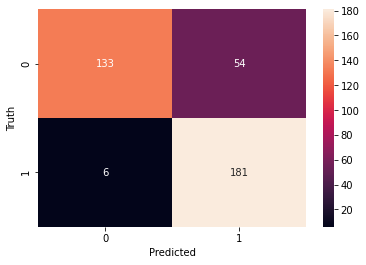

In [44]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       187
           1       0.77      0.97      0.86       187

    accuracy                           0.84       374
   macro avg       0.86      0.84      0.84       374
weighted avg       0.86      0.84      0.84       374

